In [3]:
import market as mkt
from datetime import time
sim = mkt.Simulator(code=688363, date=20220704)

In [4]:
sim.reset()
current_time = time(hour=9, minute=15, second=0)
end_time = time(hour=15, minute=0, second=0)

while current_time < end_time:
    current_time = sim.next_step()
    current_time = current_time.time()
print(sim.order_book)

2022-07-04 09:30:00
2022-07-04 10:00:00
2022-07-04 10:30:00
2022-07-04 11:00:00
2022-07-04 13:00:00
2022-07-04 13:30:00
2022-07-04 14:00:00
2022-07-04 14:30:00
2022-07-04 15:00:00
2022-07-04 15:00:00
     bid_v   bid_p   ask_p   ask_v
0   2198.0  140.78  140.79  9526.0
1   8998.0  140.77  140.80  4437.0
2   1400.0  140.73  140.84   256.0
3   2920.0  140.71  140.85   781.0
4  25114.0  140.70  140.86  1000.0
5    600.0  140.68  140.88  1400.0
6   4300.0  140.66  140.89   715.0
7   1095.0  140.65  140.90  1100.0
8    200.0  140.64  140.91   400.0
9    119.0  140.63  140.92   406.0


In [5]:
price_series = sim.order_book.historical_transaction.set_index('time')
price_series

,price,vol,bid_uid,ask_uid,is_ours,our_direction,our_cashflow,BSFlag
time,,,,,,,,
2022-07-04 09:25:00,139.30,200.0,167291,170886,False,0,0.0,0
2022-07-04 09:25:00,139.30,200.0,169563,42393,False,0,0.0,0
2022-07-04 09:25:00,139.30,100.0,201729,42393,False,0,0.0,0
2022-07-04 09:25:00,139.30,101.0,201729,122515,False,0,0.0,0
2022-07-04 09:25:00,139.30,269.0,201285,122515,False,0,0.0,0
...,...,...,...,...,...,...,...,...
2022-07-04 15:00:00,140.78,1500.0,11797609,11798991,False,0,0.0,0
2022-07-04 15:00:00,140.78,100.0,11797609,11808939,False,0,0.0,0
2022-07-04 15:00:00,140.78,200.0,11797609,11838748,False,0,0.0,0


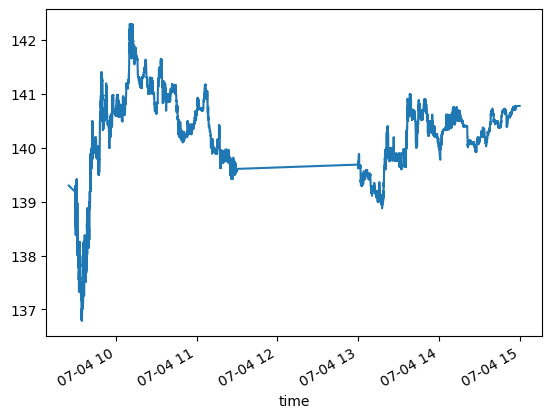

In [6]:
import matplotlib.pyplot as plt
price_series["price"].plot()
plt.show()

In [7]:
from portfolio import Portfolio
sim.reset()
port = Portfolio(cash=1e6, inventory=91000)